# Exportación de dashboard

En este último cuaderno genero un resumen listo para presentar a un público no técnico. Creo gráficos y tablas que condensan los hallazgos más importantes del proyecto. Finalmente exporto las visualizaciones a archivos que podrían incorporarse en un dashboard.


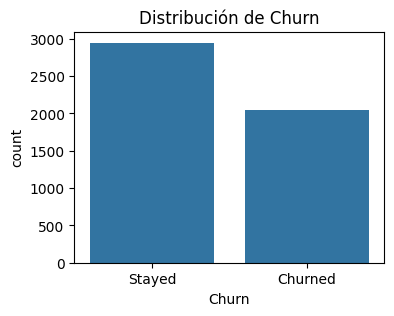

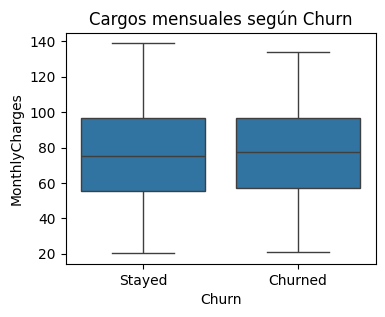

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recargo datos limpios
churn_df = pd.read_csv('../data/sample_telco_churn.csv')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df['ChurnFlag'] = churn_df['Churn'].apply(lambda x: 1 if str(x).strip().lower().startswith('churn') else 0)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in service_cols:
    churn_df[col] = churn_df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
churn_df.dropna(inplace=True)

# Gráfico 1: Distribución de churn
plt.figure(figsize=(4,3))
sns.countplot(x='Churn', data=churn_df)
plt.title('Distribución de Churn')
plt.savefig('dashboard_churn_distribution.png')
plt.show()

# Gráfico 2: Cargo mensual vs churn
plt.figure(figsize=(4,3))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df)
plt.title('Cargos mensuales según Churn')
plt.savefig('dashboard_monthlycharges.png')
plt.show()

# Resumen tabular para el dashboard
summary = churn_df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].agg(['mean','median'])
summary

# Exporto la tabla resumen a CSV para usar en un dashboard
summary.to_csv('dashboard_summary.csv')


Con estos archivos exportados (`dashboard_churn_distribution.png`, `dashboard_monthlycharges.png` y `dashboard_summary.csv`) se puede construir un tablero interactivo en una herramienta como Tableau o Power BI. En la práctica, integraría estos recursos para que los directivos exploren visualmente las tendencias de abandono.
